In [0]:
from fastai.imports  import *
%matplotlib inline

[matrixmultiplication.xyz](http://matrixmultiplication.xyz)

In [0]:
n=100

In [0]:
x = torch.ones(n, 2)

Jede Python-Funktion, die auf _ endet, liefert nicht nur das modifizierte Objekt zurück, sondern verändert es direkt.

In [0]:
x[:,0].uniform_(-1., 1)
x[:5]

tensor([[ 0.5498,  1.0000],
        [ 0.6404,  1.0000],
        [-0.4206,  1.0000],
        [ 0.8221,  1.0000],
        [-0.2631,  1.0000]])

In [0]:
a = torch.tensor((3., 2)); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

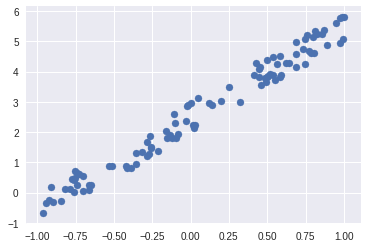

In [0]:
plt.scatter(x[:,0], y)

In [0]:
def mse(y_hat, y):
  return ((y_hat-y)**2).mean()

![alt text](https://cdn-images-1.medium.com/max/1600/1*3VJyfU1qBqoHwaDJm3KAKA.gif)

In [0]:
a = torch.tensor((-0.1,  0.2)); a

tensor([-0.1000,  0.2000])

In [0]:
x[:5]

tensor([[ 0.5498,  1.0000],
        [ 0.6404,  1.0000],
        [-0.4206,  1.0000],
        [ 0.8221,  1.0000],
        [-0.2631,  1.0000]])

In [0]:
y_hat= x@a

In [0]:
mse(y_hat, y)

tensor(9.9121)

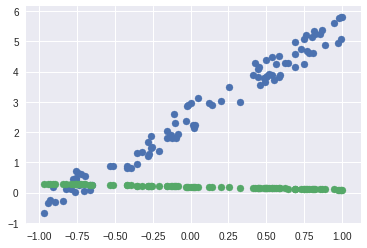

In [0]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

# Gradient Descent

In [0]:
a = nn.Parameter(a)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y, y_hat)
  if t%10 == 0: 
    print(loss)
  loss.backward()        # Pytroch berechnet automatisch die Ableitung der Funktion (egal wie wir sie bauen!)
  with torch.no_grad():
    a.sub_(lr * a.grad)  # Der Gradient (Steigung) ist in a.grad hinterlegt, wird mit der Lernrate multipliziert und von a abgezogen
    a.grad.zero_()       # grad zurücksetzen
    

In [0]:
lr = 1e-1
for t in range(100):
  update()

tensor(9.9121, grad_fn=<MeanBackward1>)
tensor(0.8276, grad_fn=<MeanBackward1>)
tensor(0.2414, grad_fn=<MeanBackward1>)
tensor(0.1244, grad_fn=<MeanBackward1>)
tensor(0.0980, grad_fn=<MeanBackward1>)
tensor(0.0919, grad_fn=<MeanBackward1>)
tensor(0.0906, grad_fn=<MeanBackward1>)
tensor(0.0903, grad_fn=<MeanBackward1>)
tensor(0.0902, grad_fn=<MeanBackward1>)
tensor(0.0902, grad_fn=<MeanBackward1>)


In [0]:
a.detach_()   # notwendig, um die Zahlenwerte aus dem NNParameter zu holen

Parameter containing:
tensor([3.0433, 2.4603])

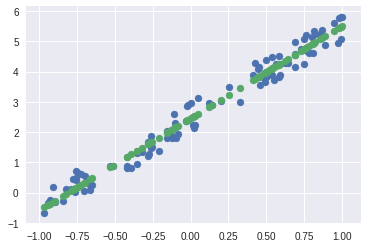

In [0]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a)

# Animate!

In [0]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [0]:
y_hat=(x@a).data.numpy()
y_hat

array([ 4.1334767 ,  4.4092817 ,  1.1801702 ,  4.9621096 ,  1.6596224 ,
        0.16657591,  5.499174  ,  1.9917958 ,  2.201708  ,  2.467179  ,
        4.2294044 ,  4.5607405 ,  5.1631613 ,  3.9378126 ,  2.3775172 ,
        2.0834475 ,  0.10533261,  4.552258  ,  3.062067  ,  2.8357468 ,
        5.4819818 ,  4.102268  ,  1.3770108 ,  2.6100636 , -0.31474638,
        3.818706  ,  2.1618288 , -0.3583591 ,  3.7515225 ,  4.8995214 ,
        4.807457  ,  2.5067093 ,  3.44548   ,  2.1296446 ,  3.7177856 ,
        3.2237146 ,  4.8420916 , -0.41103125,  4.931864  ,  2.8946915 ,
        3.9843957 ,  2.525779  ,  0.3165717 ,  4.774366  ,  5.4355955 ,
        0.20313191,  5.0598984 ,  1.2695425 ,  1.5943582 ,  0.43872237,
       -0.26706815,  0.13684511,  0.43644166,  1.8183408 ,  1.6691368 ,
       -0.03504109,  3.863209  ,  2.5400202 , -0.4786749 ,  3.83494   ,
        5.4223223 ,  1.6310244 ,  4.349929  ,  4.741035  ,  0.32944083,
        0.84775066,  0.15446854,  1.6820714 ,  1.3738114 ,  3.98

In [0]:
a = nn.Parameter(torch.tensor((-0.2, 2.5)))

fig=plt.figure()
plt.scatter(x[:,0], y, c='orange')
y_hat=(x@a).data.numpy()
x_data = x[:,0].data.numpy()
line, = plt.plot(x_data, y_hat)
plt.close()

def animate(i):
  update()
  line.set_ydata((x@a).data.numpy())
  return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=80)

# Komplexere Funktion

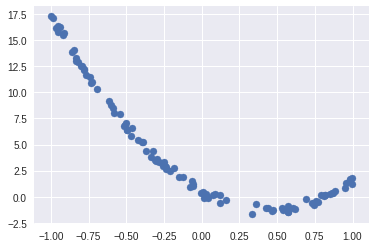

In [0]:
x = torch.ones(n, 2)
x[:,0].uniform_(-1., 1)
a = torch.tensor((9., 3))
b = torch.tensor((8., 3))

def f(x, a, b):
  return x*x@a - x@b  + torch.rand(n)

y=f(x, a, b)

plt.scatter(x[:,0], y)

In [0]:
a_param = nn.Parameter(torch.tensor((-10., 2)))
b_param = nn.Parameter(torch.tensor((23., 8)))

In [0]:
def update():
  y_hat = f(x, a_param, b_param)
  loss = mse(y, y_hat)
  if t%10 == 0: 
    print(loss)
  loss.backward()        
  with torch.no_grad():
    a_param.sub_(lr * a_param.grad)  
    a_param.grad.zero_()
    b_param.sub_(lr * b_param.grad)  
    b_param.grad.zero_()
  

In [0]:
lr = 1e-1
for t in range(1000):
  update()

tensor(264.7004, grad_fn=<MeanBackward1>)
tensor(54.5081, grad_fn=<MeanBackward1>)
tensor(21.8204, grad_fn=<MeanBackward1>)
tensor(10.9815, grad_fn=<MeanBackward1>)
tensor(6.4452, grad_fn=<MeanBackward1>)
tensor(4.2644, grad_fn=<MeanBackward1>)
tensor(2.9763, grad_fn=<MeanBackward1>)
tensor(2.0491, grad_fn=<MeanBackward1>)
tensor(1.5747, grad_fn=<MeanBackward1>)
tensor(1.0830, grad_fn=<MeanBackward1>)
tensor(0.7804, grad_fn=<MeanBackward1>)
tensor(0.6116, grad_fn=<MeanBackward1>)
tensor(0.5191, grad_fn=<MeanBackward1>)
tensor(0.3835, grad_fn=<MeanBackward1>)
tensor(0.3287, grad_fn=<MeanBackward1>)
tensor(0.2777, grad_fn=<MeanBackward1>)
tensor(0.1689, grad_fn=<MeanBackward1>)
tensor(0.2276, grad_fn=<MeanBackward1>)
tensor(0.2065, grad_fn=<MeanBackward1>)
tensor(0.1738, grad_fn=<MeanBackward1>)
tensor(0.1619, grad_fn=<MeanBackward1>)
tensor(0.1233, grad_fn=<MeanBackward1>)
tensor(0.1797, grad_fn=<MeanBackward1>)
tensor(0.1478, grad_fn=<MeanBackward1>)
tensor(0.1637, grad_fn=<MeanBackwar

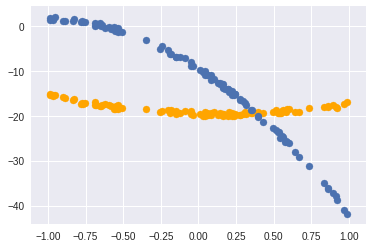

In [0]:
plt.scatter(x[:,0], y, c='orange')
plt.scatter(x[:,0], f(x, a_param, b_param).detach().numpy())

In [0]:
from matplotlib import animation, rc
rc('animation', html='html5')

a_param = nn.Parameter(torch.tensor((-4., 2)))
b_param = nn.Parameter(torch.tensor((4., 8)))

fig=plt.figure()
plt.scatter(x[:,0], y, c='orange')
y_hat=(f(x, a_param, b_param)).data.numpy()
x_data = x[:,0].data.numpy()
scatter = plt.scatter(x_data, y_hat)
plt.close()




def animate(i):
  update()
  scatter.set_offsets(np.vstack((x_data,f(x, a_param, b_param).data.numpy())).T)   # offsets will einen X*2 Array mit x/y Koordinaten. Also vertikales stacken der beiden Arrays und dann Transpose
  return scatter,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=200)